In [2]:
import numpy as np
import math
from random import randint
from matplotlib import pyplot as plt

In [3]:
X = np.genfromtxt(fname='crx.data',
					delimiter=',',
					dtype=np.float32)

In [4]:
def buildSet():

	X_train = X
	X_train = np.delete(X_train, 15, axis=1)

	a = np.array([1,0])
	b = np.array([0,1])
	Y1 = np.tile(a,(307,1))
	Y2 = np.tile(b,(383,1))

	Y_train = np.concatenate((Y1,Y2),0)

	X_test = X_train
	Y_test = Y_train
	test_index = []
	train_index = []

	while len(test_index) < 138:
		n_rand = randint(0, 689)
		if n_rand not in test_index:
			test_index.append(n_rand)
	
	test_index = sorted(test_index, reverse=True)

	for i in range(0,690):
		if i not in test_index:
			train_index.append(i)

	train_index = sorted(train_index, reverse=True)

	for i in test_index:
		X_train = np.delete(X_train, i, axis=0)
		Y_train = np.delete(Y_train, i, axis=0)

	for i in train_index:
		X_test = np.delete(X_test, i, axis=0)
		Y_test = np.delete(Y_test, i, axis=0)

	return (X_train.T, X_test.T, Y_train.T, Y_test)

In [5]:
def classifier(X_train, X_test,Y_train,Y_test):
	A = Y_train.dot(X_train.T).dot(np.linalg.pinv(X_train.dot(X_train.T)))

	Y_result = A.dot(X_test)
	Y_result = Y_result.T

	successP = 0
	successM = 0

	for i in range(0, len(Y_result)):
		comp = Y_result[i]
		if comp[0] > comp[1]:
			if False not in (Y_test[i] == [1,0]):
				successP += 1
		else:
			if False not in (Y_test[i] == [0,1]):
				successM += 1
	
	return (successP, successM)

Results: 
[72.46, 74.64, 76.81, 70.29, 73.91, 77.54, 77.54, 75.36, 72.46, 69.57, 75.36, 80.43, 77.54, 79.71, 68.12, 71.74, 81.16, 76.09, 70.29, 72.46, 74.64, 72.46, 68.84, 70.29, 73.91, 72.46, 73.19, 79.71, 76.81, 73.91, 73.91, 76.09, 72.46, 73.19, 75.36, 77.54, 71.74, 76.09, 73.91, 79.71, 71.01, 74.64, 79.71, 74.64, 73.91, 73.19, 76.09, 70.29, 76.09, 74.64, 70.29, 78.26, 74.64, 72.46, 75.36, 71.01, 76.81, 78.99, 74.64, 68.12, 75.36, 75.36, 74.64, 71.74, 76.09, 75.36, 75.36, 74.64, 73.91, 79.71, 71.01, 75.36, 76.09, 78.26, 71.74, 71.01, 70.29, 76.81, 65.22, 76.81, 73.19, 71.01, 71.74, 70.29, 74.64, 78.99, 76.81, 71.74, 74.64, 68.84, 71.74, 76.09, 73.91, 71.01, 70.29, 78.26, 68.12, 78.99, 73.91, 73.91]
Mean: 74.17%
Max: 81.16%
Min: 65.22%
Standard deviation: 3.1746718822580697
Mean of class +: 34.56%
Mean of class -: 39.62%


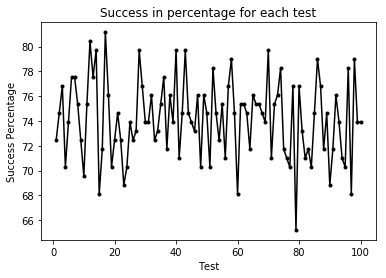

In [10]:
def main():
	result = []
	class1 = []
	class2 = []
	test = []

	for i in range(0,100):
		t = buildSet()
		c = classifier(t[0],t[1],t[2],t[3])
		result.append(round((((c[0]+c[1])/138)*100), 2))
		class1.append(round((c[0]/138)*100,2))
		class2.append(round((c[1]/138)*100,2))
		test.append(i+1)

	print('Results: \n{}'.format(result))
	print('Mean: {}%'.format(round(np.mean(result),2)))
	print('Max: {}%'.format(np.max(result)))
	print('Min: {}%'.format(np.min(result)))
	print('Standard deviation: {}'.format(np.std(result)))
	print('Mean of class +: {}%'.format(round(np.mean(class1),2)))
	print('Mean of class -: {}%'.format(round(np.mean(class2),2)))
	plt.plot(test, result, color='black', marker='.', linestyle='solid')
	plt.title('Success in percentage for each test')
	plt.ylabel('Success Percentage')
	plt.xlabel('Test')
	plt.show()

if __name__ == "__main__":
    main()